In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nnet import MLP

Epoch 0: Train Loss: 437.03610019745634
Epoch 1: Train Loss: 90.30802981680316
Epoch 2: Train Loss: 6.239087519704262
Epoch 3: Train Loss: 1.459440084436719
Epoch 4: Train Loss: 4.294071033223441
Epoch 5: Train Loss: 1.5906449360315404
Epoch 6: Train Loss: 1.9371598648787893
Epoch 7: Train Loss: 0.7852481743799153
Epoch 8: Train Loss: 0.2941988968714901
Epoch 9: Train Loss: 3.5895298139805076
Epoch 10: Train Loss: 3.9603841689974897
Epoch 11: Train Loss: 1.3657209095315737
Epoch 12: Train Loss: 2.086443565794979
Epoch 13: Train Loss: 0.5937598872321979
Epoch 14: Train Loss: 0.16776831985277524
Epoch 15: Train Loss: 3.1389250778817157
Epoch 16: Train Loss: 3.4942273690655505
Epoch 17: Train Loss: 0.3686649705052282
Epoch 18: Train Loss: 2.115308023605589
Epoch 19: Train Loss: 1.1598903456558998
Epoch 20: Train Loss: 3.386000549211588
Epoch 21: Train Loss: 1.0386286096390172
Epoch 22: Train Loss: 3.4927314389253645
Epoch 23: Train Loss: 1.9301629279602717
Epoch 24: Train Loss: 3.59121879

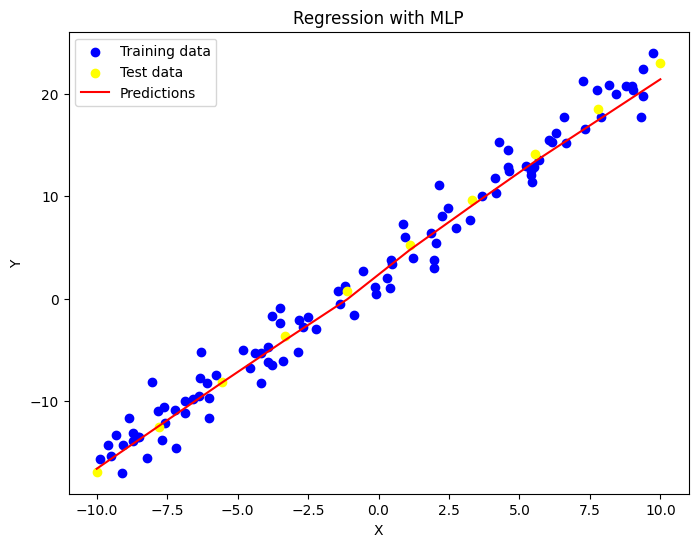

In [4]:
# Generate random input data
np.random.seed(42)
#X_train = np.random.uniform(low=-10, high=10, size=(100, 1))  # Generate 100 random values between -10 and 10

X_train = np.random.uniform(low=-10, high=10, size=(100, 1))  # Generate 100 random values between -10 and 10
noise = np.random.normal(loc=0, scale=1, size=X_train.shape)  # Generate Gaussian noise
X_train_with_noise = X_train + noise  # Add noise to the original data

y_train = 2 * X_train_with_noise + 3  # Compute corresponding target values using f(x) = 2x + 3

# Create an instance of MLP
mlp = MLP(layers=[1, 30, 1], activations=['relu', 'linear'])

# Train the MLP
mlp.fit(training_data=list(zip(X_train, y_train)), 
        epochs=500, 
        mini_batch_size=32, 
        lr=1e-4)

# Evaluate the trained model
X_test = np.linspace(-10, 10, 10).reshape(-1, 1)  # Generate test data
y_test = 2 * X_test + 3
predictions = [mlp.forward_pass(x)[-1][-1].flatten() for x in X_test]  # Compute predictions for test data
predictions = np.array(predictions) 

# Plot the results

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='yellow', label='Test data')
plt.plot(X_test, predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression with MLP')
plt.legend()
plt.show()


In [5]:
print("Predictions | Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

Predictions | Test
[-16.63952277] [-17.]
[-12.42787909] [-12.55555556]
[-8.21623541] [-8.11111111]
[-4.09479358] [-3.66666667]
[-0.06981462] [0.77777778]
[4.76008949] [5.22222222]
[9.12243068] [9.66666667]
[13.41799394] [14.11111111]
[17.43005687] [18.55555556]
[21.4421198] [23.]


Create train and val sets

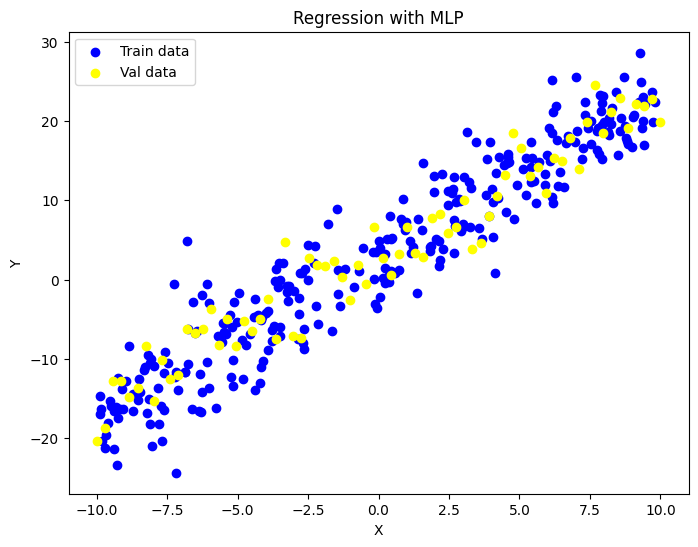

In [17]:
np.random.seed(42)
X_val = np.linspace(-10, 10, 500).reshape(-1, 1)
noise = np.random.normal(loc=0, scale=2, size=X_train.shape) 
X_train_with_noise = X_train + noise  
y_train = 2 * X_train_with_noise + 3  


X_val = np.linspace(-10, 10, 70).reshape(-1, 1)
X_val_with_noise = X_val + np.random.normal(loc=0, scale=2, size=X_val.shape)   
y_val = 2 * X_val_with_noise + 3

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_val, y_val, color='yellow', label='Val data')
#plt.plot(X_val, predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression with MLP')
plt.legend()
plt.show()

Train MLP

In [18]:
mlp = MLP(layers=[1, 5, 1], activations=['relu', 'linear'])
# Train the MLP
t_losses, v_losses = mlp.fit(training_data=list(zip            (X_train_with_noise, y_train)), 
        epochs=500, 
        mini_batch_size=64, 
        lr=1e-5,
        val_data=list(zip(X_val_with_noise, y_val)))

Epoch 0: Train Loss: 76.32141296714282 | Val loss: 156.3464172540151
Epoch 1: Train Loss: 41.83769296507859 | Val loss: 77.83812680960317
Epoch 2: Train Loss: 17.937247131294896 | Val loss: 39.234113661266626
Epoch 3: Train Loss: 14.583391107135045 | Val loss: 20.406561358907336
Epoch 4: Train Loss: 5.023652671280435 | Val loss: 11.571605364732758
Epoch 5: Train Loss: 4.162297550179334 | Val loss: 7.643033171912734
Epoch 6: Train Loss: 3.189981122660677 | Val loss: 5.955246181509234
Epoch 7: Train Loss: 2.80152607913719 | Val loss: 5.230933925675495
Epoch 8: Train Loss: 2.2340365297881912 | Val loss: 4.905621279414258
Epoch 9: Train Loss: 1.9294666182375098 | Val loss: 4.746413682630296
Epoch 10: Train Loss: 1.8878964916411596 | Val loss: 4.652416734895513
Epoch 11: Train Loss: 1.9839051719587852 | Val loss: 4.584230795486576
Epoch 12: Train Loss: 2.1944860481709423 | Val loss: 4.5244799176532835
Epoch 13: Train Loss: 1.4604383423719918 | Val loss: 4.464512482438466
Epoch 14: Train Los

Plot losses

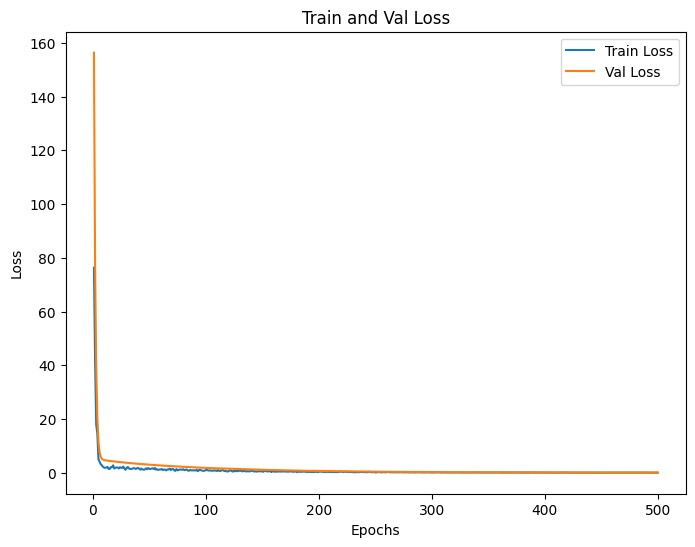

In [19]:
# Plot the training and test losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(t_losses) + 1), t_losses, label='Train Loss')
plt.plot(range(1, len(v_losses) + 1), v_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss')
plt.legend()
plt.show()

Test data

In [28]:
# Test data
np.random.seed(42)
X_test = np.linspace(-10, 10, 10).reshape(-1, 1)
X_test_with_noise = X_test + np.random.normal(loc=0, scale=2, size=X_test.shape)   
y_test = 2 * X_test_with_noise + 3.1

predictions = mlp.predict(X_test_with_noise)

print("  Predictions  |   Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

  Predictions  |   Test
[-14.89319466] [-14.91314339]
[-13.06343817] [-13.00861276]
[-5.77310633] [-5.42035696]
[2.52971153] [2.52545276]
[-0.6220848] [-0.05883572]
[4.77457699] [4.38567439]
[15.78881827] [16.08351793]
[17.09459658] [17.28085003]
[16.54582885] [16.77765801]
[25.80761141] [25.27024017]


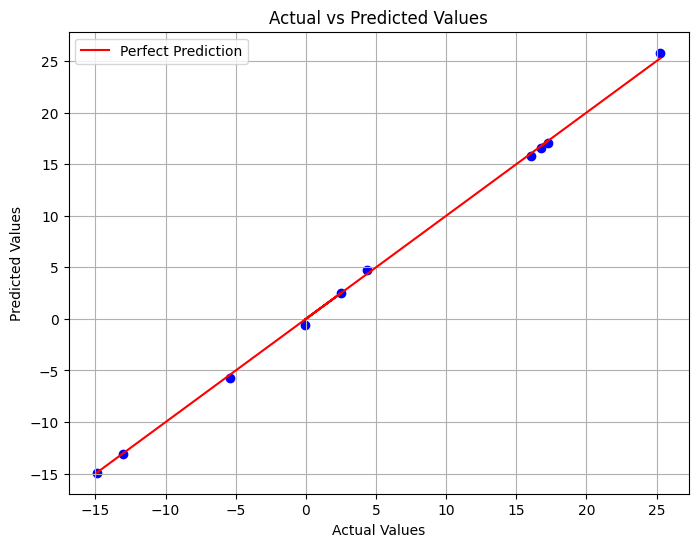

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Plot perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Non-linear dataset

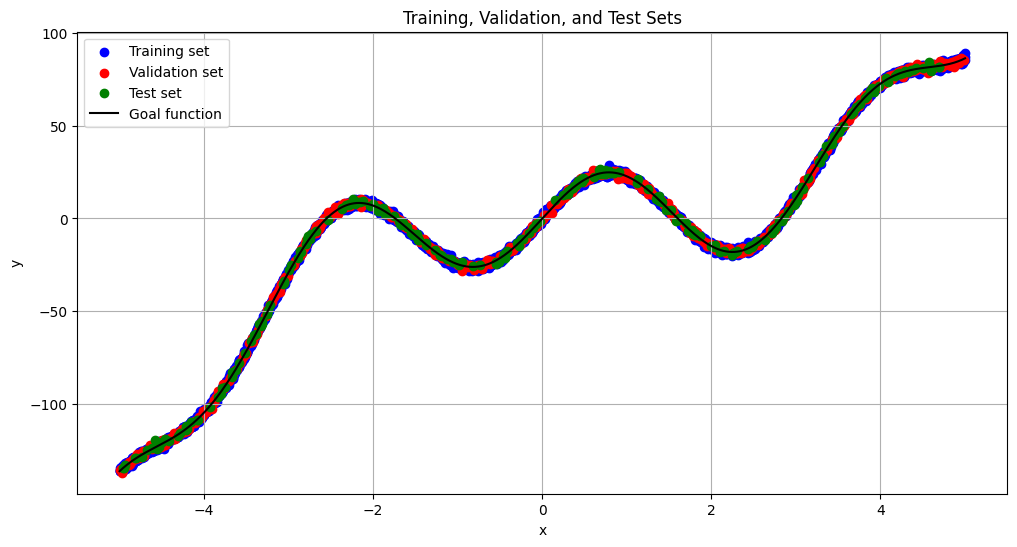

In [72]:
np.random.seed(42)
x = np.linspace(start = -5, stop =5, num = 5000)
y = x**3 - x**2 + 25 * np.sin(2*x)
# Add noise to y
noise = np.random.normal(loc=0, scale=1, size=y.shape)
y_with_noise = y + noise

# Define the ratios for splitting the dataset
train_ratio = 0.80  # 80% for training
val_ratio = 0.15    # 15% for validation
test_ratio = 0.05   # 5% for testing

# Calculate the number of samples for training
train_samples = int(len(x) * train_ratio)

# Calculate the number of samples for validation
val_samples = int(len(x) * val_ratio)

# Calculate the number of samples for testing
test_samples = int(len(x) * test_ratio)

# Shuffle the indices
indices = np.arange(len(x))
np.random.shuffle(indices)

# Split the indices into training, validation, and test indices
train_indices = indices[:train_samples]
val_indices = indices[train_samples:train_samples + val_samples]
test_indices = indices[train_samples + val_samples:train_samples + val_samples + test_samples]

# Split the dataset into training, validation, and test sets
x_train, y_train = x[train_indices], y_with_noise[train_indices]
x_val, y_val = x[val_indices], y_with_noise[val_indices]
x_test, y_test = x[test_indices], y_with_noise[test_indices]

# Plot the training, validation, and test sets
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='blue', label='Training set')
plt.scatter(x_val, y_val, color='red', label='Validation set')
plt.scatter(x_test, y_test, color='green', label='Test set')
plt.plot(x, y, color='black', label='Goal function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training, Validation, and Test Sets')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
mlp = MLP(layers=[1,7,8,7,1], activations=['relu','relu','relu','linear'])
# Train the MLP
t_losses, v_losses = mlp.fit(training_data=list(zip(x_train, y_train)), 
        epochs=100, 
        mini_batch_size=32, 
        lr=1e-5,
        val_data=list(zip(x_val, y_val)))

Epoch 0: Train Loss: 337.6908744404448 | Val loss: 607.010627286661
Epoch 1: Train Loss: 262.5034419085844 | Val loss: 467.4010663144631
Epoch 2: Train Loss: 153.8271266749816 | Val loss: 274.4586057162039
Epoch 3: Train Loss: 139.26046720708558 | Val loss: 251.6435317781879
Epoch 4: Train Loss: 85.01041981152666 | Val loss: 188.3142823138272
Epoch 5: Train Loss: 104.35066911627236 | Val loss: 275.9872560431392
Epoch 6: Train Loss: 41.67640185067611 | Val loss: 85.5799259994784
Epoch 7: Train Loss: 20.01858825609391 | Val loss: 64.51272604745195
Epoch 8: Train Loss: 26.758316190764848 | Val loss: 46.68159389837827
Epoch 9: Train Loss: 21.089057278393827 | Val loss: 33.58232599881514
Epoch 10: Train Loss: 18.898177071043115 | Val loss: 38.57180076131179
Epoch 11: Train Loss: 11.411986416179143 | Val loss: 24.798304301219
Epoch 12: Train Loss: 5.204328342385053 | Val loss: 18.851710389636015
Epoch 13: Train Loss: 8.311236524329765 | Val loss: 19.829432955219293
Epoch 14: Train Loss: 14.7

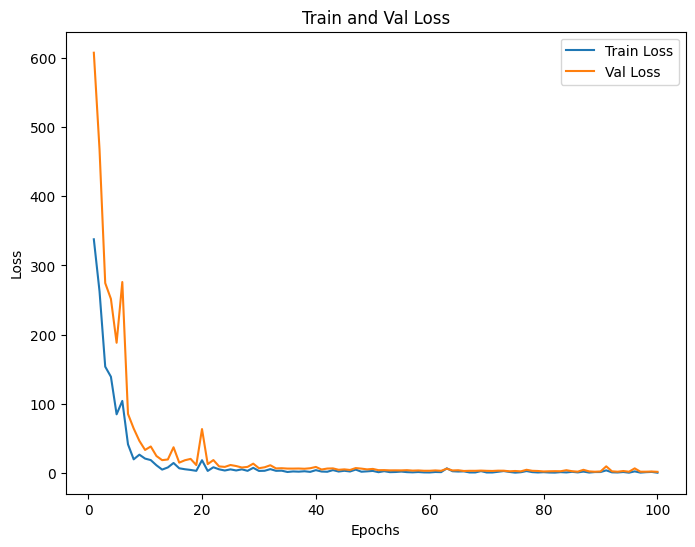

In [ ]:
# Plot the training and test losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(t_losses) + 1), t_losses, label='Train Loss')
plt.plot(range(1, len(v_losses) + 1), v_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss')
plt.legend()
plt.show()

In [84]:
predictions = mlp.predict(x_test)

print("  Predictions  |   Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

  Predictions  |   Test
[-77.84483588] -78.06220761082962
[-134.12066697] -134.71938509727408
[-16.68177872] -16.8704164315015
[-20.18580688] -23.346082839423104
[-18.42466538] -19.800341598129187
[2.80654697] 3.281808766300399
[-7.55405916] -6.154538892197161
[6.57344039] 9.943541341496534
[7.52301823] 10.263594660027033
[24.00119946] 25.047784970374156
[-14.75398432] -14.670062450558257
[0.93828666] -1.4589357617801082
[7.94938795] 6.67041031173483
[7.68734823] 8.865533754438129
[-13.00518069] -13.71427739816268
[68.71735458] 68.73705621647295
[13.69821521] 9.25291159286849
[-18.50896267] -19.10226301027929
[78.29662516] 80.20031502236023
[3.52833681] 5.895730578199724
[18.08928425] 18.26195316471665
[-1.2418745] -1.1249772442791
[0.57691254] -1.6514483866922531
[-9.92320112] -11.81473734141713
[-15.84783049] -14.362411878991782
[73.77028179] 73.44252258321228
[-133.77040125] -132.8397265481483
[-8.76734034] -8.032199375452775
[-6.135152] -5.779624825547252
[83.09821915] 81.795151864

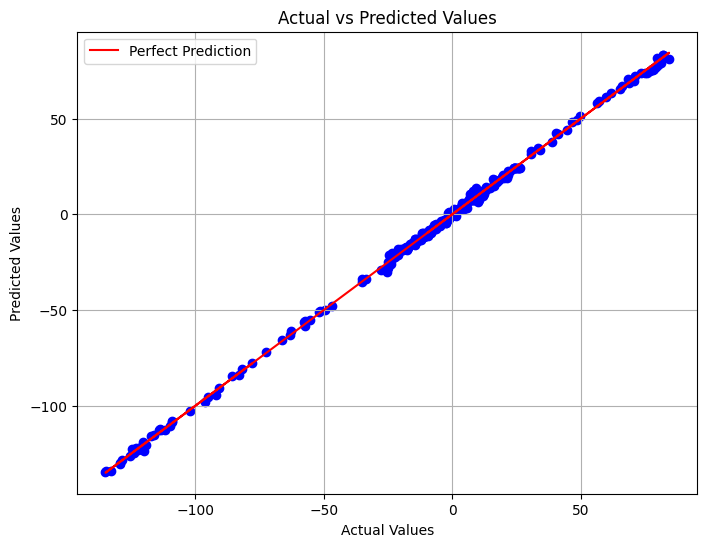

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Plot perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Dataset housing prices

In [61]:
train_df = pd.read_csv("./datasets/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
train_df["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [4]:
features = ['OverallQual' , 'GarageCars', 'GrLivArea' , 'TotalBsmtSF' , 'BsmtFinSF1' ,
            '2ndFlrSF'    , 'GarageArea', '1stFlrSF'    , 'YearBuilt'  ]
X = train_df[features]
X

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,7,1710,856,706,854,548,856,2003
1,6,1262,1262,978,0,460,1262,1976
2,7,1786,920,486,866,608,920,2001
3,7,1717,756,216,756,642,961,1915
4,8,2198,1145,655,1053,836,1145,2000
...,...,...,...,...,...,...,...,...
1455,6,1647,953,0,694,460,953,1999
1456,6,2073,1542,790,0,500,2073,1978
1457,7,2340,1152,275,1152,252,1188,1941
1458,5,1078,1078,49,0,240,1078,1950


In [5]:
y = train_df["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Preprocessing

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   BsmtFinSF1   1460 non-null   int64
 4   2ndFlrSF     1460 non-null   int64
 5   GarageArea   1460 non-null   int64
 6   1stFlrSF     1460 non-null   int64
 7   YearBuilt    1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [7]:
# How many nans?
X.isnull().sum().sum()

0

In [8]:
y.isnull().sum().sum()

0

In [9]:
# Feature scaling (optional but recommended)
def standardize(X):
  # Calculate mean and standard deviation across all features
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  
  # Standardize features by subtracting mean and dividing by std (avoid division by zero)
  return (X - mean) / (std + 1e-8)

X_scaled = standardize(X)
X_scaled.head()

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,0.651479,0.370333,-0.459303,0.575425,1.161852,0.351000,-0.793434,1.050994
1,-0.071836,-0.482512,0.466465,1.171992,-0.795163,-0.060731,0.257140,0.156734
2,0.651479,0.515013,-0.313369,0.092907,1.189351,0.631726,-0.627826,0.984752
3,0.651479,0.383659,-0.687324,-0.499274,0.937276,0.790804,-0.521734,-1.863632
4,1.374795,1.299326,0.199680,0.463568,1.617877,1.698485,-0.045611,0.951632


In [25]:
def train_test_split(X, y, test_size=0.2, random_state=None):
  """
  Shuffle and split data into training and testing sets.

  Parameters:
      X: DataFrame of features.
      y: Series of target variable.
      test_size: Proportion of data for the test set (0 to 1).
      random_state: Seed for shuffling (optional).

  Returns:
      X_train, X_test, y_train, y_test: Split data.
  """

  # Shuffle data using sample (ensures shuffling by rows)
  if random_state:
    np.random.seed(random_state)
  shuffled_df = X.sample(frac=1, random_state=random_state)  # Shuffle DataFrame rows

  # Split into training and testing sets
  split_index = int(len(shuffled_df) * (1 - test_size))
  X_train, X_test = shuffled_df.iloc[:split_index], shuffled_df.iloc[split_index:]
  y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

  return X_train, X_test, y_train, y_test

# Split the data using your function
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, random_state=42)

Create MLP model

In [149]:
np.random.seed(42)
mlp = MLP(layers=[len(X_train.columns), 25,20, 1], activations=["relu","relu","linear"])  # Update layer size

X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
train_data = list(zip(X_train_np, y_train.values.reshape(-1, 1)))  
valid_data = list(zip(X_val_np, y_val.values.reshape(-1, 1)))  

# Train the MLP
t_losses, v_losses = mlp.fit(training_data=train_data, 
        epochs=400, 
        mini_batch_size=32, 
        lr=1e-3,
        val_data=valid_data)

/home/linar/Desktop/ML/Clases/Clase 3/i302/nnet.py:88: RuntimeWarning: invalid value encountered in add
  nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]


Epoch 0: Train Loss: nan | Val loss: nan
Epoch 1: Train Loss: nan | Val loss: nan
Epoch 2: Train Loss: nan | Val loss: nan
Epoch 3: Train Loss: nan | Val loss: nan
Epoch 4: Train Loss: nan | Val loss: nan
Epoch 5: Train Loss: nan | Val loss: nan


KeyboardInterrupt: 